Importing Libraries

In [1]:
import numpy as np   #numerical python for mathametical opperatioins 
import pandas as pd  #data manupulation usind pandas
import matplotlib.pyplot as plt  #visualization using plots 
import seaborn as sns            #visualization using plots 
from warnings import filterwarnings  
filterwarnings("ignore")         #to ignore warnings
#statistical test
from sklearn.model_selection import train_test_split #to split data into train and test data 
from sklearn.linear_model import LinearRegression    #for predection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score #Evaluation matrix
from sklearn.preprocessing import StandardScaler        #used to scale the features
from sklearn.model_selection import RandomizedSearchCV  #to find the best hyperparameters

Importing Dataset

In [4]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\advertising.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.shape

(200, 4)

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Exploratory Data Analysis

In [17]:
def num(num_feature):
    print("Data Type\n",data[num_feature].dtype)
    print("Unique Datas\n",data[num_feature].unique())
    print("Describing the data\n",data[num_feature].describe())

    sns.scatterplot(x=num_feature,y="Sales",data=data)
    plt.show()
    sns.boxplot(data[num_feature])

    print("correlation\n",np.corrcoef(data[num_feature],data.Sales))

In [10]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

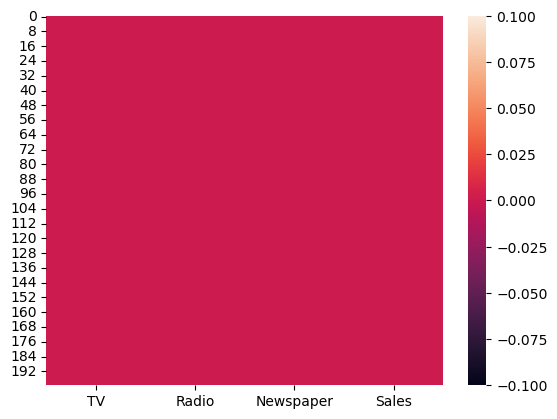

In [11]:
sns.heatmap(data.isnull())

Target Variable

In [12]:
data.Sales.describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

<Axes: >

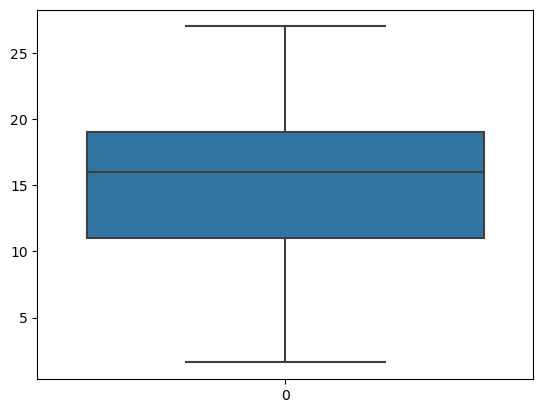

In [13]:
sns.boxplot(data.Sales)

<Axes: xlabel='Sales', ylabel='Density'>

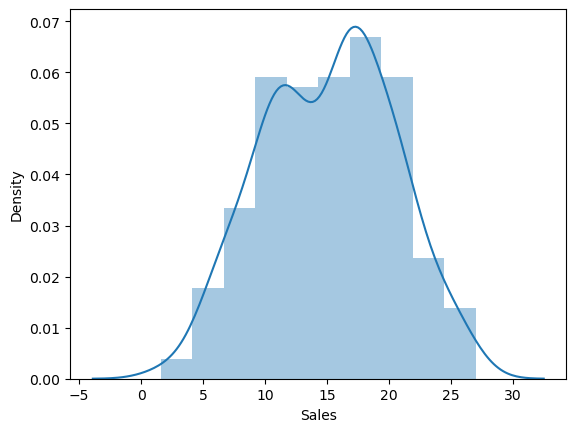

In [14]:
sns.distplot(data.Sales)

Indipendent Variables

In [15]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

TV

Data Type
 float64
Unique Datas
 [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5

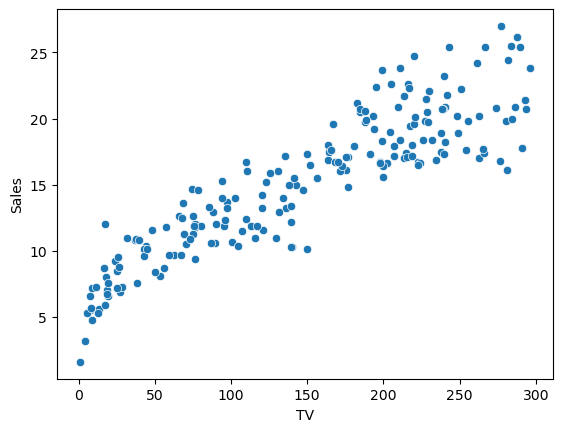

correlation
 [[1.         0.90120791]
 [0.90120791 1.        ]]


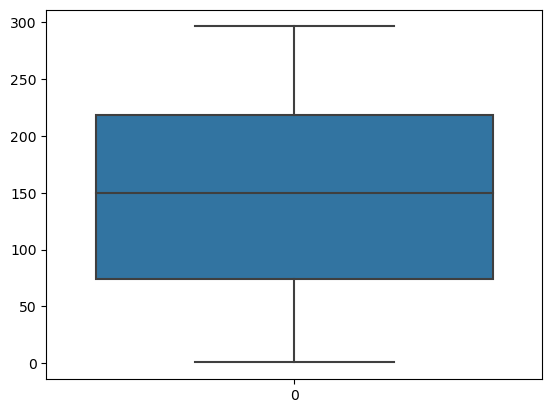

In [18]:
num("TV")

In [22]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Radio

Data Type
 float64
Unique Datas
 [37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 28.1 19.2
 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9 30.6 14.3
 33.   5.7 43.7  1.6 28.5 29.9  7.7 20.3 44.5 43.  18.4 40.6 25.5 47.8
  4.9 33.5 36.5 14.  31.6 21.  42.3  4.3 36.3 10.1 17.2 34.3 46.4 11.
  0.3  0.4 26.9  8.2 38.  15.4 20.6 46.8 35.   0.8 36.9 26.8 21.7  2.4
 34.6 32.3 11.8 38.9  0.  49.  12.   2.9 27.2 38.6 47.  39.  28.9 25.9
 17.  35.4 33.2 14.8  1.9  7.3 40.3 25.8 13.9 23.3 39.7 21.1 11.6 43.5
  1.3 18.1 35.8 36.8 14.7  3.4 37.6  5.2 23.6 10.6 20.9 20.1  7.1 30.2
  7.8  2.3 10.   5.4 21.3 45.1 28.7 12.1 41.1 42.  35.6  3.7  8.6]
Describing the data
 count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000

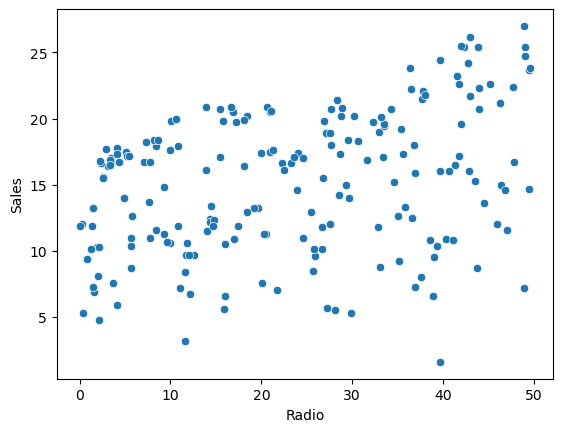

correlation
 [[1.        0.3496311]
 [0.3496311 1.       ]]


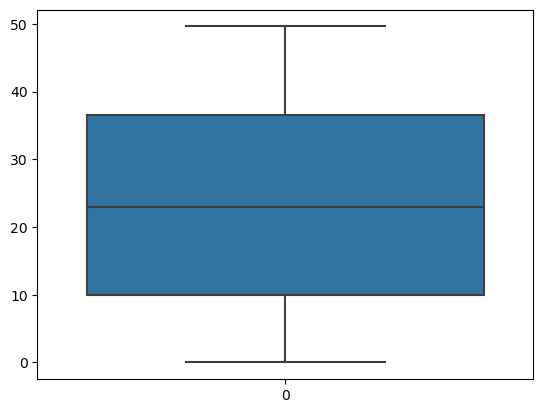

In [19]:
num("Radio")

In [24]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Newspaper

Data Type
 float64
Unique Datas
 [ 69.2  45.1  69.3  58.5  58.4  75.   23.5  11.6   1.   21.2  24.2   4.
  65.9   7.2  46.   52.9 114.   55.8  18.3  19.1  53.4  49.6  26.2  19.5
  12.6  22.9  40.8  43.2  38.6  30.    0.3   7.4   8.5   5.   45.7  35.1
  32.   31.6  38.7   1.8  26.4  43.3  31.5  35.7  18.5  49.9  36.8  34.6
   3.6  39.6  58.7  15.9  60.   41.4  16.6  37.7   9.3  21.4  54.7  27.3
   8.4  28.9   0.9   2.2  10.2  11.   27.2  31.7  19.3  31.3  13.1  89.4
  20.7  14.2   9.4  23.1  22.3  36.9  32.5  35.6  33.8  65.7  16.   63.2
  73.4  51.4  33.   59.   72.3  10.9   5.9  22.   51.2  45.9  49.8 100.9
  17.9   5.3  29.7  23.2  25.6   5.5  56.5   2.4  10.7  34.5  52.7  14.8
  79.2  46.2  50.4  15.6  12.4  74.2  25.9  50.6   9.2   3.2  43.1   8.7
  43.    2.1  65.6  59.7  20.5   1.7  12.9  75.6  37.9  34.4  38.9   9.
  44.3  11.9  20.6  37.   48.7   9.5   5.7  50.5  24.3  45.2  30.7  49.3
   5.4  84.8  21.6  19.4  57.6   6.4  18.4  47.4  17.   12.8  41.8  20.3
  35.2  23.7  17.6  

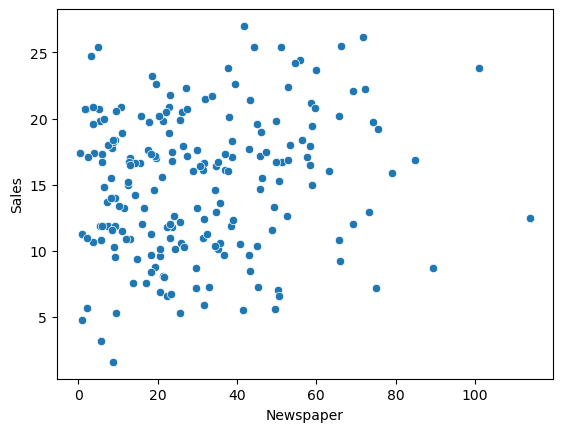

correlation
 [[1.         0.15796003]
 [0.15796003 1.        ]]


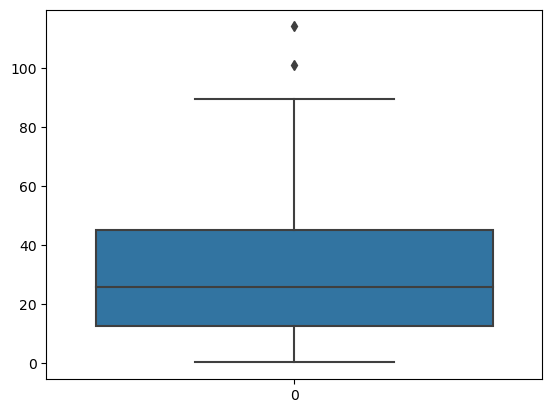

In [21]:
num("Newspaper")

In [23]:
X=data.drop("Sales",axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y=data.Sales
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1.5807699836627307
Test RMSE = 1.9259614580966709
Train R2_square = 0.9015117113489859
Test R2_square = 0.894718283793501


In [46]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 1.72547095020461
Train R2_square = 1.0
Test R2_square = 0.9154968154312508


In [47]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.44272184410755727
Test RMSE = 1.6428431909345425
Train R2_square = 0.9922748106829794
Test R2_square = 0.9233962560029976


Finding best parameters using random search cv

In [52]:
n_estimators=[i for i in range(50,500,50)]
max_depth=[i for i in range(5,30,5)]
max_leaf_nodes=[i for i in range(2,20,2)]
criterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"max_leaf_nodes":max_leaf_nodes,"criterion":criterion}

In [53]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)
RF_model.fit(X_train,y_train)
RF_model.best_params_

{'n_estimators': 400,
 'max_leaf_nodes': 14,
 'max_depth': 15,
 'criterion': 'friedman_mse'}

In [55]:
RF=RandomForestRegressor(n_estimators= 400,max_leaf_nodes=14, max_depth= 15,criterion= 'friedman_mse')
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.9002843394087104
Test RMSE = 1.7400618092926028
Train R2_square = 0.9680547257564814
Test R2_square = 0.9140616279288767
